# Stock Analysis using Machine Learning with news articles - Rida Shahwar

In [16]:
import yfinance as yf
import pandas as pd

# Example: Download historical data for $ONCO
onco_data = yf.download('ONCO', start='2020-01-01', end='2024-10-17')

[*********************100%***********************]  1 of 1 completed


In [17]:
import yfinance as yf

# List of stock symbols
stocks = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Function to fetch news headlines for each stock
def fetch_news(stocks):
    news_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        news = ticker.news  # Fetch the news related to the stock

        # Store the news headlines
        news_data[stock] = []
        for item in news:
            news_data[stock].append({
                'datetime': item['providerPublishTime'],  # Assuming this is in Unix time
                'headline': item['title'],
                'link': item['link']
            })

    return news_data

# Fetch news headlines
news_data = fetch_news(stocks)

# Display news for each stock
for stock, news in news_data.items():
    print(f"News for {stock}:")
    for item in news:
        print(f"{item['datetime']} - {item['headline']} - {item['link']}")
    print("\n")


News for ONCO:
1727988300 - Correction: Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/correction-onconetix-announces-financing-2-204500909.html
1727960700 - Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/onconetix-announces-financing-2-0-130500997.html
1726847100 - Onconetix, Inc. Announces 1-for-40 Reverse Stock Split and Results of the Annual Meeting of Stockholders - https://finance.yahoo.com/news/onconetix-inc-announces-1-40-154500172.html


News for CNEY:
1728657298 - CN Energy Regains Compliance With Nasdaq Minimum Market Value Rule - https://finance.yahoo.com/news/cn-energy-regains-compliance-nasdaq-143458137.html
1728651600 - CNEY Regains Compliance with Nasdaq Minimum Market Value of Pub

In [18]:
!pip install vaderSentiment


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(news_data):
    sentiment_data = {}
    for stock, news in news_data.items():
        sentiments = []
        for item in news:
            sentiment = analyzer.polarity_scores(item['headline'])
            sentiments.append(sentiment['compound'])
        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        sentiment_data[stock] = avg_sentiment
    return sentiment_data

# Analyze sentiment
sentiment_data = analyze_sentiment(news_data)

# Display sentiment for each stock
for stock, sentiment in sentiment_data.items():
    print(f"Average Sentiment for {stock}: {sentiment}")


Average Sentiment for ONCO: 0.25453333333333333
Average Sentiment for CNEY: 0.3460375
Average Sentiment for TNXP: 0.0011124999999999885
Average Sentiment for APLD: 0.026787500000000006
Average Sentiment for KTTA: 0.2739


In [20]:
import yfinance as yf
import pandas as pd

# Function to fetch historical stock data and combine with sentiment
def fetch_and_combine_data(stocks, sentiment_data):
    combined_data = {}
    for stock in stocks:
        # Fetch historical data
        stock_data = yf.download(stock, start='2020-01-01', end='2024-10-17')
        # Add sentiment data
        stock_data['Sentiment'] = sentiment_data[stock]
        combined_data[stock] = stock_data
    return combined_data

# Fetch and combine data
combined_data = fetch_and_combine_data(stocks, sentiment_data)

# Display combined data for each stock
for stock, data in combined_data.items():
    print(f"Combined Data for {stock}:")
    print(data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Combined Data for ONCO:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-18  2000.000000  2300.000000  1520.000000  2296.000000  2296.000000   
2022-02-22  2700.000000  3636.000000  2004.000000  2278.800049  2278.800049   
2022-02-23  1895.599976  2072.000000  1302.000000  1992.000000  1992.000000   
2022-02-24  1600.800049  1780.000000  1459.199951  1712.199951  1712.199951   
2022-02-25  1559.599976  1779.599976  1504.479980  1774.000000  1774.000000   

            Volume  Sentiment  
Date                           
2022-02-18    3295   0.254533  
2022-02-22    2683   0.254533  
2022-02-23    1478   0.254533  
2022-02-24    1080   0.254533  
2022-02-25     903   0.254533  
Combined Data for CNEY:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-05  240.000000  26

In [21]:
# Function to add moving average feature
def add_moving_average(data, window=10):
    data['MA_10'] = data['Close'].rolling(window=window).mean()
    return data

# Add moving average feature
for stock, data in combined_data.items():
    combined_data[stock] = add_moving_average(data)

# Display data with moving average for each stock
for stock, data in combined_data.items():
    print(f"Data with Moving Average for {stock}:")
    print(data.head())


Data with Moving Average for ONCO:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-18  2000.000000  2300.000000  1520.000000  2296.000000  2296.000000   
2022-02-22  2700.000000  3636.000000  2004.000000  2278.800049  2278.800049   
2022-02-23  1895.599976  2072.000000  1302.000000  1992.000000  1992.000000   
2022-02-24  1600.800049  1780.000000  1459.199951  1712.199951  1712.199951   
2022-02-25  1559.599976  1779.599976  1504.479980  1774.000000  1774.000000   

            Volume  Sentiment  MA_10  
Date                                  
2022-02-18    3295   0.254533    NaN  
2022-02-22    2683   0.254533    NaN  
2022-02-23    1478   0.254533    NaN  
2022-02-24    1080   0.254533    NaN  
2022-02-25     903   0.254533    NaN  
Data with Moving Average for CNEY:
                  Open        High         Low       Close   Adj Close  \
Date                         

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def train_model(data):
    # Prepare dataset
    # Explicitly list all features to ensure consistency
    features = ['MA_10', 'MA_50', 'Volatility', 'Volume_Change', 'Sentiment', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']
    data = data.dropna(subset=features + ['Close'])  # Include 'Close' for y calculation and drop NaNs in all relevant columns

    X = data[features]
    y = (data['Close'].shift(-1) > data['Close']).astype(int)

    # Align X and y indices after shift operation
    y = y.loc[X.index]

    # Replace infinite values with NaN and drop them for both X and y
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.loc[X.index]  # Re-align y with X after dropping rows in X

    # Ensure X and y have the same length
    assert len(X) == len(y), "X and y must have the same length"

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Validate model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

In [24]:
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# List of stock symbols
stocks = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Function to fetch news headlines for each stock
def fetch_news(stocks):
    news_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        news = ticker.news  # Fetch the news related to the stock
        # Store the news headlines
        news_data[stock] = []
        for item in news:
            news_data[stock].append({
                'datetime': item['providerPublishTime'],  # Assuming this is in Unix time
                'headline': item['title'],
                'link': item['link']
            })
    return news_data

# Fetch news headlines
news_data = fetch_news(stocks)

# Display news for each stock
for stock, news in news_data.items():
    print(f"News for {stock}:")
    for item in news:
        print(f"{item['datetime']} - {item['headline']} - {item['link']}")
    print("\n")

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(news_data):
    sentiment_data = {}
    for stock, news in news_data.items():
        sentiments = []
        for item in news:
            sentiment = analyzer.polarity_scores(item['headline'])
            sentiments.append(sentiment['compound'])
        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        sentiment_data[stock] = avg_sentiment
    return sentiment_data

# Analyze sentiment
sentiment_data = analyze_sentiment(news_data)

# Display sentiment for each stock
for stock, sentiment in sentiment_data.items():
    print(f"Average Sentiment for {stock}: {sentiment}")

# Function to fetch historical stock data and combine with sentiment
def fetch_and_combine_data(stocks, sentiment_data):
    combined_data = {}
    for stock in stocks:
        # Fetch historical data
        stock_data = yf.download(stock, start='2020-01-01', end='2024-09-26')
        # Add sentiment data
        stock_data['Sentiment'] = sentiment_data[stock]
        combined_data[stock] = stock_data
    return combined_data

# Fetch and combine data
combined_data = fetch_and_combine_data(stocks, sentiment_data)

# Display combined data for each stock
for stock, data in combined_data.items():
    print(f"Combined Data for {stock}:")
    print(data.head())

# Function to add technical indicators
def add_technical_indicators(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['Volatility'] = data['Close'].rolling(window=10).std()
    data['Volume_Change'] = data['Volume'].pct_change()
    data['RSI'] = compute_rsi(data['Close'], window=14)
    data['MACD'], data['MACD_Signal'] = compute_macd(data['Close'])
    data['Bollinger_Upper'], data['Bollinger_Lower'] = compute_bollinger_bands(data['Close'])
    return data

def compute_rsi(series, window):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    macd_signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    bollinger_upper = rolling_mean + (rolling_std * num_std)
    bollinger_lower = rolling_mean - (rolling_std * num_std)
    return bollinger_upper, bollinger_lower

# Add technical indicators
for stock, data in combined_data.items():
    combined_data[stock] = add_technical_indicators(data)

# Display data with technical indicators for each stock
for stock, data in combined_data.items():
    print(f"Data with Technical Indicators for {stock}:")
    print(data.head())

# Function to normalize features
def normalize_features(data):
    scaler = StandardScaler()
    features = ['MA_10', 'MA_50', 'Volatility', 'Volume_Change', 'Sentiment', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']
    # Replace infinite values with NaN before scaling
    data[features] = data[features].replace([np.inf, -np.inf], np.nan)
    # Drop rows with NaN values in features before scaling
    data.dropna(subset=features, inplace=True)
    data[features] = scaler.fit_transform(data[features])
    return data

# Normalize features
for stock, data in combined_data.items():
    combined_data[stock] = normalize_features(data)

# Display normalized data for each stock
for stock, data in combined_data.items():
    print(f"Normalized Data for {stock}:")
    print(data.head())

# Updated train_model function
def train_model(data):
    # Prepare dataset
    features = ['MA_10', 'MA_50', 'Volatility', 'Volume_Change', 'Sentiment', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']
    data = data.dropna(subset=features + ['Close'])  # Include 'Close' for y calculation and drop NaNs in all relevant columns
    X = data[features]
    y = (data['Close'].shift(-1) > data['Close']).astype(int)

    # Align X and y indices after shift operation
    y = y.loc[X.index]

    # Replace infinite values with NaN and drop them for both X and y
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.loc[X.index]  # Re-align y with X after dropping rows in X

    # Ensure X and y have the same length
    assert len(X) == len(y), "X and y must have the same length"

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Validate model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

# Train model for each stock
models = {}
accuracies = {}
for stock, data in combined_data.items():
    model, accuracy = train_model(data)
    models[stock] = model
    accuracies[stock] = accuracy

# Display model accuracy for each stock
for stock, accuracy in accuracies.items():
    print(f"Model Accuracy for {stock}: {accuracy}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

News for ONCO:
1727988300 - Correction: Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/correction-onconetix-announces-financing-2-204500909.html
1727960700 - Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/onconetix-announces-financing-2-0-130500997.html
1726847100 - Onconetix, Inc. Announces 1-for-40 Reverse Stock Split and Results of the Annual Meeting of Stockholders - https://finance.yahoo.com/news/onconetix-inc-announces-1-40-154500172.html


News for CNEY:
1728657298 - CN Energy Regains Compliance With Nasdaq Minimum Market Value Rule - https://finance.yahoo.com/news/cn-energy-regains-compliance-nasdaq-143458137.html
1728651600 - CNEY Regains Compliance with Nasdaq Minimum Market Value of Pub


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Combined Data for ONCO:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-18  2000.000000  2300.000000  1520.000000  2296.000000  2296.000000   
2022-02-22  2700.000000  3636.000000  2004.000000  2278.800049  2278.800049   
2022-02-23  1895.599976  2072.000000  1302.000000  1992.000000  1992.000000   
2022-02-24  1600.800049  1780.000000  1459.199951  1712.199951  1712.199951   
2022-02-25  1559.599976  1779.599976  1504.479980  1774.000000  1774.000000   

            Volume  Sentiment  
Date                           
2022-02-18    3295   0.254533  
2022-02-22    2683   0.254533  
2022-02-23    1478   0.254533  
2022-02-24    1080   0.254533  
2022-02-25     903   0.254533  
Combined Data for CNEY:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-05  240.000000  26

In [26]:
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# List of stock symbols
stocks = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Function to fetch news headlines for each stock
def fetch_news(stocks):
    news_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        news = ticker.news  # Fetch the news related to the stock
        # Store the news headlines
        news_data[stock] = []
        for item in news:
            news_data[stock].append({
                'datetime': item['providerPublishTime'],  # Assuming this is in Unix time
                'headline': item['title'],
                'link': item['link']
            })
    return news_data

# Fetch news headlines
news_data = fetch_news(stocks)

# Display news for each stock
for stock, news in news_data.items():
    print(f"News for {stock}:")
    for item in news:
        print(f"{item['datetime']} - {item['headline']} - {item['link']}")
    print("\n")

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(news_data):
    sentiment_data = {}
    for stock, news in news_data.items():
        sentiments = []
        for item in news:
            sentiment = analyzer.polarity_scores(item['headline'])
            sentiments.append(sentiment['compound'])
        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        sentiment_data[stock] = avg_sentiment
    return sentiment_data

# Analyze sentiment
sentiment_data = analyze_sentiment(news_data)

# Display sentiment for each stock
for stock, sentiment in sentiment_data.items():
    print(f"Average Sentiment for {stock}: {sentiment}")

# Function to fetch historical stock data and combine with sentiment
def fetch_and_combine_data(stocks, sentiment_data):
    combined_data = {}
    for stock in stocks:
        # Fetch historical data
        stock_data = yf.download(stock, start='2020-01-01', end='2024-09-26')
        # Add sentiment data
        stock_data['Sentiment'] = sentiment_data[stock]
        combined_data[stock] = stock_data
    return combined_data

# Fetch and combine data
combined_data = fetch_and_combine_data(stocks, sentiment_data)

# Display combined data for each stock
for stock, data in combined_data.items():
    print(f"Combined Data for {stock}:")
    print(data.head())

# Function to add technical indicators
def add_technical_indicators(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['Volatility'] = data['Close'].rolling(window=10).std()
    data['Volume_Change'] = data['Volume'].pct_change()
    data['RSI'] = compute_rsi(data['Close'], window=14)
    data['MACD'], data['MACD_Signal'] = compute_macd(data['Close'])
    data['Bollinger_Upper'], data['Bollinger_Lower'] = compute_bollinger_bands(data['Close'])
    data['Lagged_Return'] = data['Close'].pct_change().shift(1)
    data['Volume_Trend'] = data['Volume'].rolling(window=10).mean()
    return data

def compute_rsi(series, window):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    macd_signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    bollinger_upper = rolling_mean + (rolling_std * num_std)
    bollinger_lower = rolling_mean - (rolling_std * num_std)
    return bollinger_upper, bollinger_lower

# Add technical indicators
for stock, data in combined_data.items():
    combined_data[stock] = add_technical_indicators(data)

# Display data with technical indicators for each stock
for stock, data in combined_data.items():
    print(f"Data with Technical Indicators for {stock}:")
    print(data.head())

# Function to normalize features
def normalize_features(data):
    scaler = StandardScaler()
    features = ['MA_10', 'MA_50', 'Volatility', 'Volume_Change', 'Sentiment', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'Lagged_Return', 'Volume_Trend']
    # Replace infinite values with NaN before scaling
    data[features] = data[features].replace([np.inf, -np.inf], np.nan)
    # Drop rows with NaN values in the features
    data.dropna(subset=features, inplace=True)
    data[features] = scaler.fit_transform(data[features])
    return data

# Normalize features
for stock, data in combined_data.items():
    combined_data[stock] = normalize_features(data)

# Display normalized data for each stock
for stock, data in combined_data.items():
    print(f"Normalized Data for {stock}:")
    print(data.head())

# Updated train_model function with hyperparameter tuning
def train_model(data):
    # Prepare dataset
    features = ['MA_10', 'MA_50', 'Volatility', 'Volume_Change', 'Sentiment', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'Lagged_Return', 'Volume_Trend']
    data = data.dropna(subset=features + ['Close'])  # Include 'Close' for y calculation and drop NaNs in all relevant columns
    X = data[features]
    y = (data['Close'].shift(-1) > data['Close']).astype(int)

    # Align X and y indices after shift operation
    y = y.loc[X.index]

    # Replace infinite values with NaN and drop them for both X and y
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.loc[X.index]  # Re-align y with X after dropping rows in X

    # Ensure X and y have the same length
    assert len(X) == len(y), "X and y must have the same length"

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a RandomForestClassifier model
    model = RandomForestClassifier(random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Validate model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return best_model, accuracy

# Train model for each stock
models = {}
accuracies = {}
for stock, data in combined_data.items():
    model, accuracy = train_model(data)
    models[stock] = model
    accuracies[stock] = accuracy

# Display model accuracy for each stock
for stock, accuracy in accuracies.items():
    print(f"Model Accuracy for {stock}: {accuracy}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

News for ONCO:
1727988300 - Correction: Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/correction-onconetix-announces-financing-2-204500909.html
1727960700 - Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/onconetix-announces-financing-2-0-130500997.html
1726847100 - Onconetix, Inc. Announces 1-for-40 Reverse Stock Split and Results of the Annual Meeting of Stockholders - https://finance.yahoo.com/news/onconetix-inc-announces-1-40-154500172.html


News for CNEY:
1728657298 - CN Energy Regains Compliance With Nasdaq Minimum Market Value Rule - https://finance.yahoo.com/news/cn-energy-regains-compliance-nasdaq-143458137.html
1728651600 - CNEY Regains Compliance with Nasdaq Minimum Market Value of Pub

Data with Technical Indicators for ONCO:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-18  2000.000000  2300.000000  1520.000000  2296.000000  2296.000000   
2022-02-22  2700.000000  3636.000000  2004.000000  2278.800049  2278.800049   
2022-02-23  1895.599976  2072.000000  1302.000000  1992.000000  1992.000000   
2022-02-24  1600.800049  1780.000000  1459.199951  1712.199951  1712.199951   
2022-02-25  1559.599976  1779.599976  1504.479980  1774.000000  1774.000000   

            Volume  Sentiment  MA_10  MA_50  Volatility  Volume_Change  RSI  \
Date                                                                          
2022-02-18    3295   0.254533    NaN    NaN         NaN            NaN  NaN   
2022-02-22    2683   0.254533    NaN    NaN         NaN      -0.185736  NaN   
2022-02-23    1478   0.254533    NaN    NaN         NaN      -0.449124  NaN   
2022-02-24

In [27]:
# time series analysis for the above using lstm

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'combined_data' is your dictionary of stock data with features

def prepare_data_for_lstm(data, target_column='Close', look_back=60):
  """Prepares data for LSTM by creating sequences and scaling."""

  df = data.copy()
  dataset = df[target_column].values.reshape(-1, 1)

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)

  X, Y = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i + look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])

  return np.array(X), np.array(Y), scaler


def create_lstm_model(look_back):
  """Creates an LSTM model."""
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
  model.add(LSTM(units=50))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


# Example usage for a single stock
stock = 'ONCO'  # Choose your stock
look_back = 60  # Number of previous days to consider

X, Y, scaler = prepare_data_for_lstm(combined_data[stock])

# Split into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and train the LSTM model
model = create_lstm_model(look_back)
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])




Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 - 9s - 26ms/step - loss: 0.0031
Epoch 2/100
363/363 - 9s - 24ms/step - loss: 0.0027
Epoch 3/100
363/363 - 8s - 22ms/step - loss: 0.0023
Epoch 4/100
363/363 - 9s - 25ms/step - loss: 0.0021
Epoch 5/100
363/363 - 10s - 28ms/step - loss: 0.0021
Epoch 6/100
363/363 - 9s - 24ms/step - loss: 0.0019
Epoch 7/100
363/363 - 9s - 25ms/step - loss: 0.0021
Epoch 8/100
363/363 - 8s - 22ms/step - loss: 0.0018
Epoch 9/100
363/363 - 11s - 30ms/step - loss: 0.0018
Epoch 10/100
363/363 - 10s - 28ms/step - loss: 0.0018
Epoch 11/100
363/363 - 7s - 19ms/step - loss: 0.0018
Epoch 12/100
363/363 - 12s - 32ms/step - loss: 0.0018
Epoch 13/100
363/363 - 9s - 24ms/step - loss: 0.0018
Epoch 14/100
363/363 - 9s - 23ms/step - loss: 0.0017
Epoch 15/100
363/363 - 9s - 24ms/step - loss: 0.0018
Epoch 16/100
363/363 - 7s - 21ms/step - loss: 0.0017
Epoch 17/100
363/363 - 8s - 22ms/step - loss: 0.0018
Epoch 18/100
363/363 - 11s - 29ms/step - loss: 0.0015
Epoch 19/100
363/363 - 10s - 28ms/step - loss: 0.0019
Epoch 20

Train RMSE: 10.202161665483823
Test RMSE: 1.1934714085289206


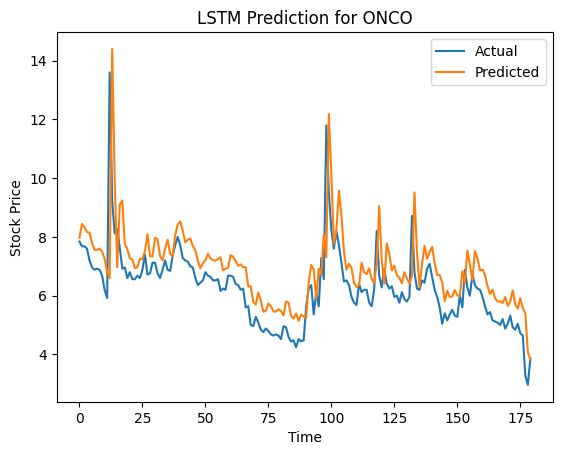

In [28]:
# prompt: # Evaluate the model and analyze the results (e.g., RMSE, visualization)
# # ... (You can add your evaluation metrics and visualization here)

# Evaluate the LSTM model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Plot the results
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predict[:,0], label='Predicted')
plt.title(f'LSTM Prediction for {stock}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Analyzing CNEY...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


539/539 - 14s - 27ms/step - loss: 0.0055
Epoch 2/100
539/539 - 21s - 40ms/step - loss: 0.0035
Epoch 3/100
539/539 - 20s - 38ms/step - loss: 0.0031
Epoch 4/100
539/539 - 20s - 37ms/step - loss: 0.0028
Epoch 5/100
539/539 - 12s - 23ms/step - loss: 0.0021
Epoch 6/100
539/539 - 20s - 38ms/step - loss: 0.0017
Epoch 7/100
539/539 - 20s - 36ms/step - loss: 0.0012
Epoch 8/100
539/539 - 12s - 22ms/step - loss: 8.9423e-04
Epoch 9/100
539/539 - 21s - 38ms/step - loss: 8.4164e-04
Epoch 10/100
539/539 - 12s - 23ms/step - loss: 0.0016
Epoch 11/100
539/539 - 20s - 37ms/step - loss: 8.2189e-04
Epoch 12/100
539/539 - 21s - 38ms/step - loss: 8.8369e-04
Epoch 13/100
539/539 - 20s - 37ms/step - loss: 6.9018e-04
Epoch 14/100
539/539 - 21s - 39ms/step - loss: 9.8486e-04
Epoch 15/100
539/539 - 12s - 22ms/step - loss: 6.9661e-04
Epoch 16/100
539/539 - 20s - 38ms/step - loss: 5.4046e-04
Epoch 17/100
539/539 - 20s - 38ms/step - loss: 6.2096e-04
Epoch 18/100
539/539 - 21s - 38ms/step - loss: 9.5787e-04
Epoch 19/

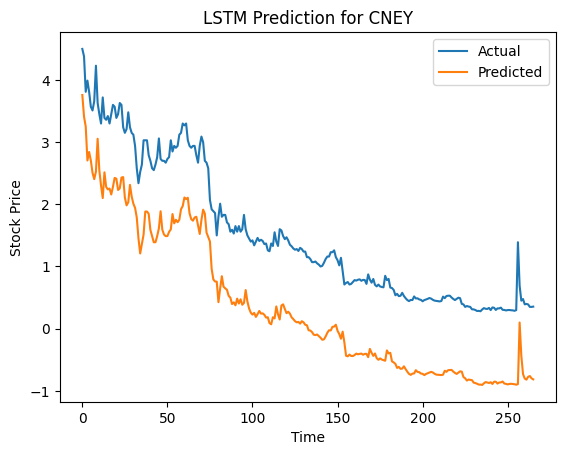

Analyzing TNXP...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


724/724 - 19s - 27ms/step - loss: 0.0047
Epoch 2/100
724/724 - 15s - 21ms/step - loss: 0.0024
Epoch 3/100
724/724 - 20s - 28ms/step - loss: 0.0018
Epoch 4/100
724/724 - 21s - 29ms/step - loss: 0.0014
Epoch 5/100
724/724 - 22s - 31ms/step - loss: 0.0013
Epoch 6/100
724/724 - 19s - 26ms/step - loss: 0.0015
Epoch 7/100
724/724 - 22s - 30ms/step - loss: 0.0012
Epoch 8/100
724/724 - 19s - 26ms/step - loss: 0.0011
Epoch 9/100
724/724 - 16s - 21ms/step - loss: 0.0011
Epoch 10/100
724/724 - 16s - 22ms/step - loss: 0.0012
Epoch 11/100
724/724 - 20s - 28ms/step - loss: 0.0012
Epoch 12/100
724/724 - 22s - 30ms/step - loss: 0.0011
Epoch 13/100
724/724 - 19s - 26ms/step - loss: 0.0010
Epoch 14/100
724/724 - 15s - 21ms/step - loss: 9.6550e-04
Epoch 15/100
724/724 - 16s - 22ms/step - loss: 9.3141e-04
Epoch 16/100
724/724 - 20s - 28ms/step - loss: 9.0333e-04
Epoch 17/100
724/724 - 16s - 22ms/step - loss: 9.7550e-04
Epoch 18/100
724/724 - 21s - 29ms/step - loss: 8.5601e-04
Epoch 19/100
724/724 - 19s - 

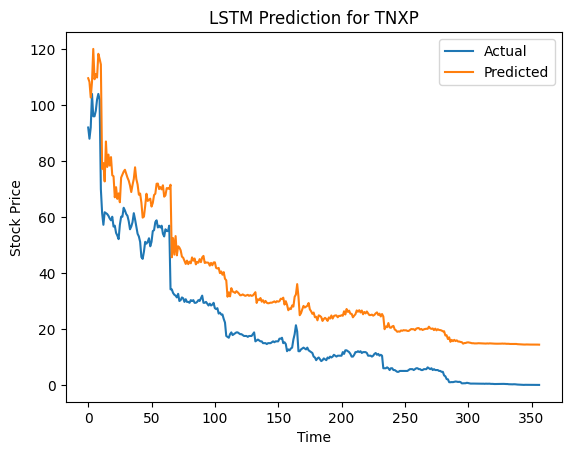

Analyzing APLD...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


339/339 - 10s - 30ms/step - loss: 0.0141
Epoch 2/100
339/339 - 11s - 33ms/step - loss: 0.0058
Epoch 3/100
339/339 - 10s - 30ms/step - loss: 0.0052
Epoch 4/100
339/339 - 6s - 19ms/step - loss: 0.0045
Epoch 5/100
339/339 - 12s - 34ms/step - loss: 0.0038
Epoch 6/100
339/339 - 10s - 31ms/step - loss: 0.0033
Epoch 7/100
339/339 - 6s - 19ms/step - loss: 0.0031
Epoch 8/100
339/339 - 10s - 30ms/step - loss: 0.0025
Epoch 9/100
339/339 - 8s - 24ms/step - loss: 0.0027
Epoch 10/100
339/339 - 7s - 19ms/step - loss: 0.0030
Epoch 11/100
339/339 - 8s - 24ms/step - loss: 0.0030
Epoch 12/100
339/339 - 6s - 19ms/step - loss: 0.0026
Epoch 13/100
339/339 - 8s - 24ms/step - loss: 0.0025
Epoch 14/100
339/339 - 7s - 19ms/step - loss: 0.0031
Epoch 15/100
339/339 - 8s - 24ms/step - loss: 0.0026
Epoch 16/100
339/339 - 10s - 31ms/step - loss: 0.0026
Epoch 17/100
339/339 - 6s - 19ms/step - loss: 0.0028
Epoch 18/100
339/339 - 8s - 24ms/step - loss: 0.0025
Epoch 19/100
339/339 - 10s - 28ms/step - loss: 0.0026
Epoch 

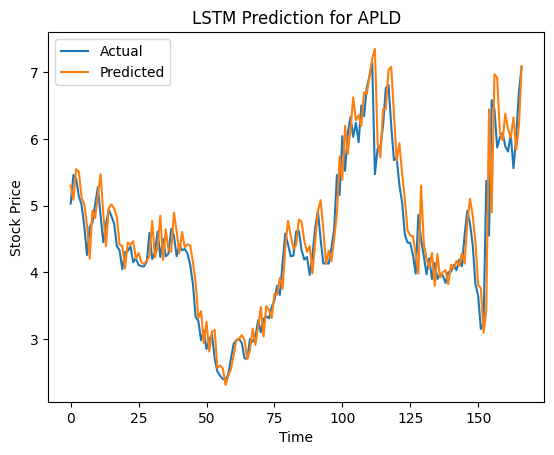

Analyzing KTTA...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


434/434 - 12s - 28ms/step - loss: 2.9070e-04
Epoch 2/100
434/434 - 9s - 20ms/step - loss: 1.7667e-04
Epoch 3/100
434/434 - 11s - 25ms/step - loss: 1.3351e-04
Epoch 4/100
434/434 - 10s - 23ms/step - loss: 1.4596e-04
Epoch 5/100
434/434 - 10s - 23ms/step - loss: 1.1168e-04
Epoch 6/100
434/434 - 8s - 19ms/step - loss: 9.4513e-05
Epoch 7/100
434/434 - 11s - 26ms/step - loss: 8.9467e-05
Epoch 8/100
434/434 - 10s - 23ms/step - loss: 9.2269e-05
Epoch 9/100
434/434 - 10s - 23ms/step - loss: 7.4771e-05
Epoch 10/100
434/434 - 9s - 20ms/step - loss: 9.2185e-05
Epoch 11/100
434/434 - 12s - 27ms/step - loss: 6.1650e-05
Epoch 12/100
434/434 - 11s - 25ms/step - loss: 7.3789e-05
Epoch 13/100
434/434 - 10s - 24ms/step - loss: 7.8582e-05
Epoch 14/100
434/434 - 8s - 19ms/step - loss: 7.7861e-05
Epoch 15/100
434/434 - 11s - 26ms/step - loss: 5.7668e-05
Epoch 16/100
434/434 - 11s - 25ms/step - loss: 6.5876e-05
Epoch 17/100
434/434 - 10s - 24ms/step - loss: 7.2644e-05
Epoch 18/100
434/434 - 8s - 20ms/step -

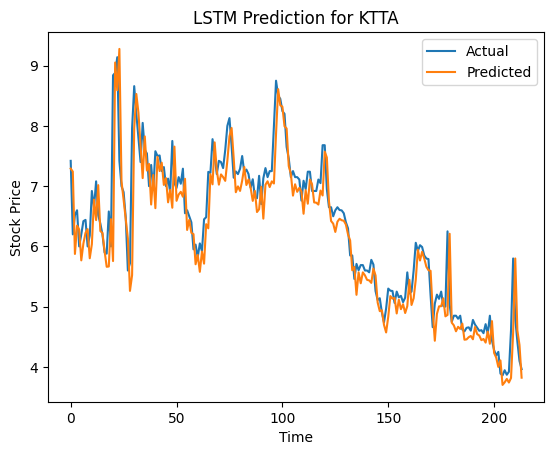

In [29]:
# time series for  'CNEY', 'TNXP', 'APLD', 'KTTA' stocks

# Assuming 'combined_data' is your dictionary of stock data with features

def prepare_data_for_lstm(data, target_column='Close', look_back=60):
  """Prepares data for LSTM by creating sequences and scaling."""

  df = data.copy()
  dataset = df[target_column].values.reshape(-1, 1)

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)

  X, Y = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i + look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])

  return np.array(X), np.array(Y), scaler


def create_lstm_model(look_back):
  """Creates an LSTM model."""
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
  model.add(LSTM(units=50))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


# Example usage for multiple stocks
stocks_to_analyze = ['CNEY', 'TNXP', 'APLD', 'KTTA']
look_back = 60  # Number of previous days to consider

for stock in stocks_to_analyze:
  print(f"Analyzing {stock}...")

  X, Y, scaler = prepare_data_for_lstm(combined_data[stock])

  # Split into training and testing sets
  train_size = int(len(X) * 0.67)
  test_size = len(X) - train_size
  X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
  Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

  # Reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # Create and train the LSTM model
  model = create_lstm_model(look_back)
  model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

  # Make predictions
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Invert predictions back to original scale
  train_predict = scaler.inverse_transform(train_predict)
  Y_train = scaler.inverse_transform([Y_train])
  test_predict = scaler.inverse_transform(test_predict)
  Y_test = scaler.inverse_transform([Y_test])

  # Evaluate the LSTM model

  # Calculate RMSE for training and testing sets
  train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
  test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

  print('Train RMSE:', train_rmse)
  print('Test RMSE:', test_rmse)

  # Plot the results
  plt.plot(Y_test[0], label='Actual')
  plt.plot(test_predict[:,0], label='Predicted')
  plt.title(f'LSTM Prediction for {stock}')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()